In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [14]:
data = pd.read_csv('train.csv')
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [3]:
sns.displot(data, x = 'SalePrice')

NameError: name 'data' is not defined

In [4]:
dict_encoder = dict()
def transform_func(x):
    return np.log(x)
def inverse_transform_func(x):
    return np.exp(x) 
def fit_target_encoder(data, feature_name, target):
    j = 1
    unique_val = list(data[feature_name].unique())
    dict_encoder[feature_name] = dict()        
    data.fillna(0, inplace = True)
    #if data[feature_name].isna().any():
    #    data[feature_name].fillna(0)
    for i in unique_val:
        if i != 0:
            #mean_val = target[data[feature_name] == i].mean()
            dict_encoder[feature_name][i] = int(j) 
            data.loc[data[feature_name] == i,feature_name] = int(j) 
            j += 1
    data[feature_name] = data[feature_name].astype("int64")
def target_encoder(data, feature_name):
    data.fillna(0, inplace = True)
    for i in list(data[feature_name].unique()):
        if i != 0 and i in dict_encoder[feature_name].keys(): 
            data.loc[data[feature_name] == i, feature_name] = dict_encoder[feature_name][i]
        else:
            print(feature_name)
            print(dict_encoder[feature_name].keys())
            print("{0} key not found in {1}".format(i, feature_name))  
    return data        
def model_estimator(model, data):
    model.fit(data[0], data[1])
    print("train score {0}, test score {1}".format(model.score(data[0], data[1]), model.score(data[2], data[3])))
    print("trian log_loss {0}, test log_loss {1}".format(msle(inverse_transform_func(data[1]), inverse_transform_func(model.predict(data[0]))),
                                                         msle(inverse_transform_func(data[3]), inverse_transform_func(model.predict(data[2]))))) 
#data = data.drop(columns = 'Id')


In [5]:
data = data.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'])
data['log_SalePrice'] = transform_func(data['SalePrice'])
sns.displot(data, x = 'log_SalePrice')


NameError: name 'data' is not defined

In [6]:
data = data.drop(columns = ['Street', 'Utilities', 'Condition2', 'HouseStyle', 'RoofStyle', \
               'HeatingQC', 'Functional', 'GarageCond', 'PavedDrive', 'SaleType', \
               'SaleCondition', 'RoofMatl', 'Exterior2nd', 'ExterCond', 'BsmtCond', \
               'BsmtFinType2', 'Heating', 'Condition1', 'Electrical', 'GarageType', 'Exterior1st'])
categorial_features = list(data.select_dtypes(include = ["object"]).columns)
number_features = list(data.select_dtypes(include = ["number"]).columns)
number_features.remove('SalePrice')
number_features.remove('log_SalePrice')

NameError: name 'data' is not defined

In [7]:
for i in numeric_features:
    if data[i].nunique() < 25:
        sns.boxplot(data = data, x = i, y = 'log_SalePrice')
    else:    
        sns.scatterplot(data = data, x = i, y = 'log_SalePrice')
    plt.show()

NameError: name 'numeric_features' is not defined

In [8]:
encoder_data = data.copy()
encoder_data = encoder_data.drop(columns = ['SalePrice', 'log_SalePrice'])
for i in categorial_features:
    fit_target_encoder(encoder_data, i, data['log_SalePrice'])
#categorial_features = list(data.select_dtypes(include = ["object"]).columns)
#umber_features = list(data.select_dtypes(include = ["number"]).columns)    
corr_frame = pd.DataFrame()
all_features = number_features.copy()
all_features.extend(categorial_features)
corr = abs(encoder_data[all_features].corr(method = 'spearman'))
corr = corr.applymap(lambda x: 0 if x < 0.7 else 1)
while True:
    corr['number_relation'] = corr[corr == 1].sum()
    if corr['number_relation'].max() > 1:
        drop_feature = list(corr['number_relation'][corr['number_relation'] == corr['number_relation'].max()].index)
        corr.drop(index = drop_feature[0], columns = drop_feature[0], inplace = True)
    else:
        break

NameError: name 'data' is not defined

In [9]:
plt.figure(figsize = (15, 15))
print(sns.heatmap(data.corr(method = 'spearman'), xticklabels = 1, yticklabels = 1))

NameError: name 'data' is not defined

In [10]:
data.head()

NameError: name 'data' is not defined

In [11]:
encoder_data.head()

NameError: name 'encoder_data' is not defined

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
scaler = StandardScaler()
data.fillna(0, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(data[corr.index], data['log_SalePrice'], test_size = 0.3, random_state=10) 

from sklearn.metrics import mean_squared_log_error as msle


KeyboardInterrupt: 

In [83]:
dict_encoder = {}
for i in categorial_features:
    if i in corr.index:
        fit_target_encoder(x_train, i, y_train)

In [84]:
for i in categorial_features:
    if i in corr.index:
        target_encoder(x_test, i)

MasVnrType
dict_keys(['None', 'BrkFace', 'Stone', 'BrkCmn'])
0 key not found in MasVnrType
BsmtQual
dict_keys(['TA', 'Ex', 'Gd', 'Fa'])
0 key not found in BsmtQual
BsmtExposure
dict_keys(['No', 'Av', 'Gd', 'Mn'])
0 key not found in BsmtExposure
BsmtFinType1
dict_keys(['Rec', 'BLQ', 'Unf', 'GLQ', 'ALQ', 'LwQ'])
0 key not found in BsmtFinType1
FireplaceQu
dict_keys(['Gd', 'TA', 'Po', 'Fa', 'Ex'])
0 key not found in FireplaceQu
GarageFinish
dict_keys(['Unf', 'RFn', 'Fin'])
0 key not found in GarageFinish
GarageQual
dict_keys(['TA', 'Fa', 'Gd', 'Po', 'Ex'])
0 key not found in GarageQual


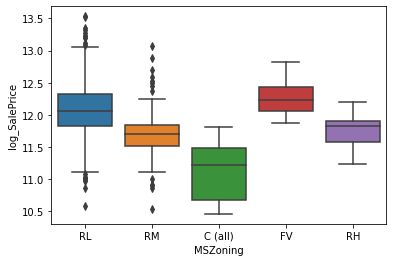

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


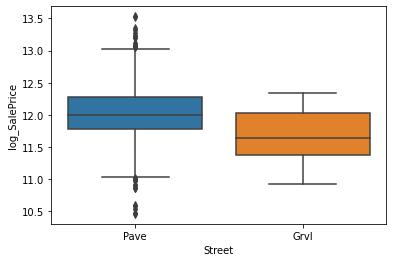

Pave    1454
Grvl       6
Name: Street, dtype: int64


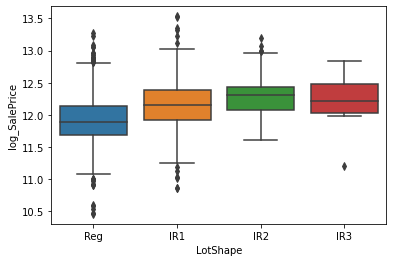

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


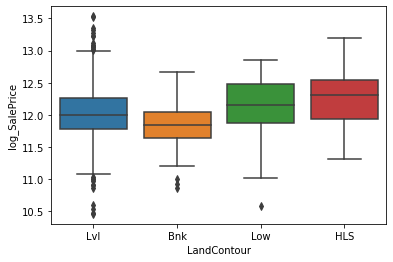

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


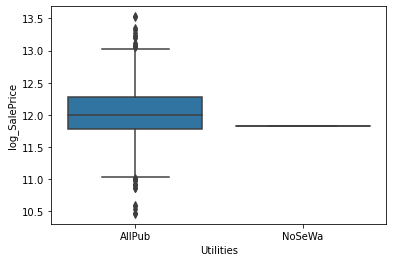

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


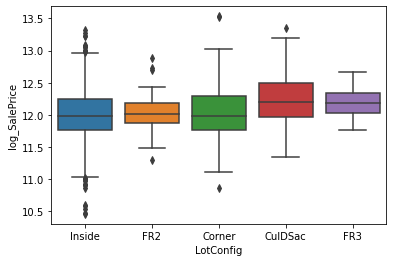

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


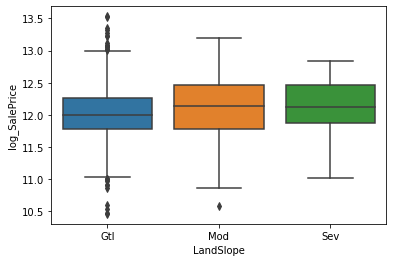

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


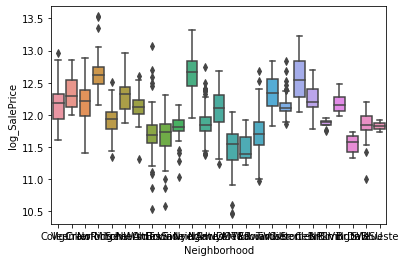

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


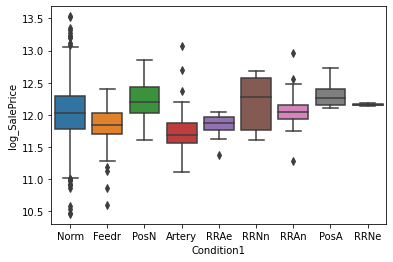

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


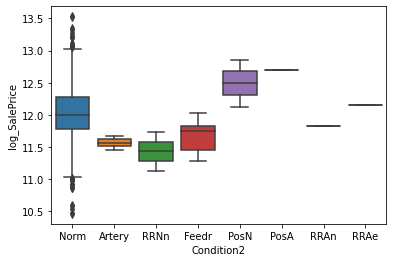

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64


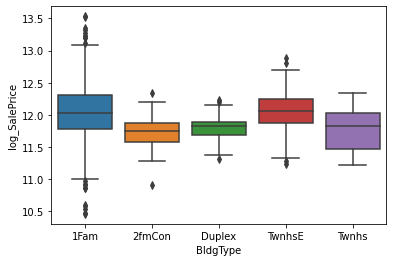

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


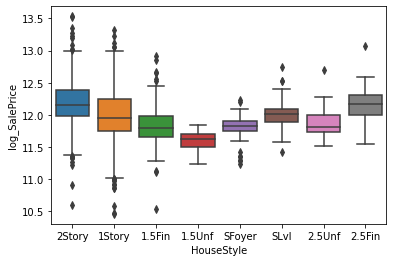

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


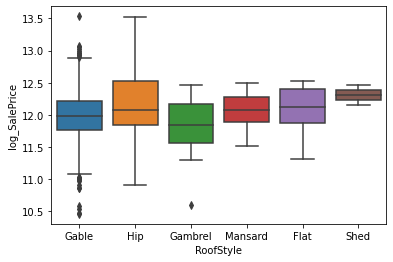

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


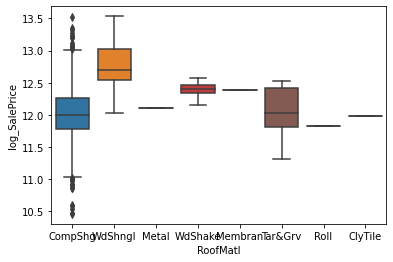

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64


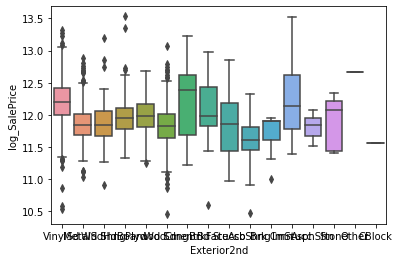

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


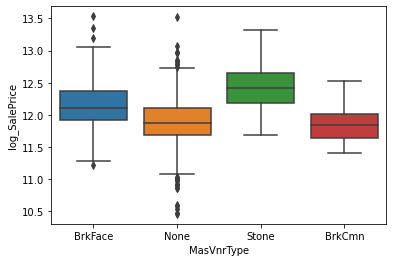

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


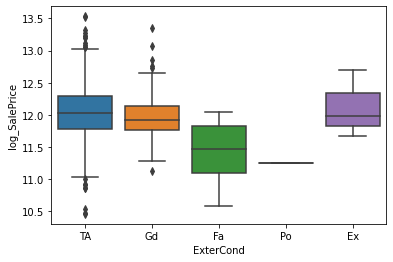

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


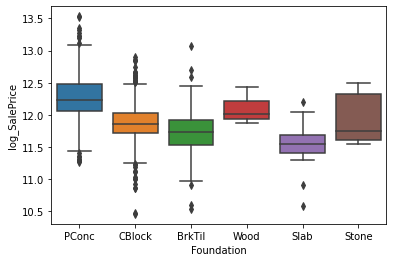

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


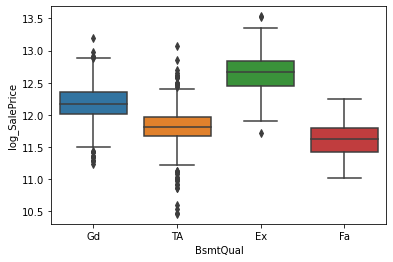

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


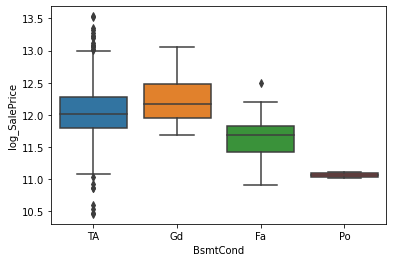

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


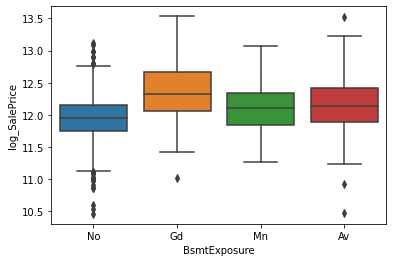

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


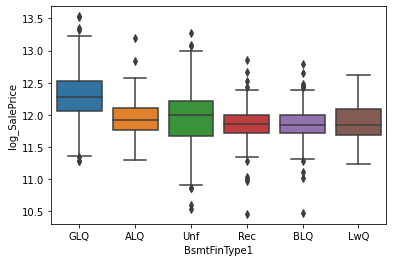

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


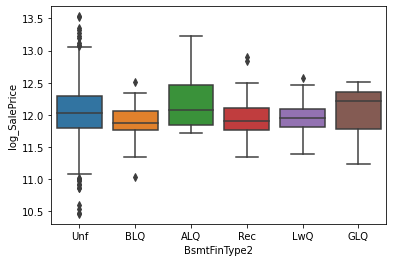

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


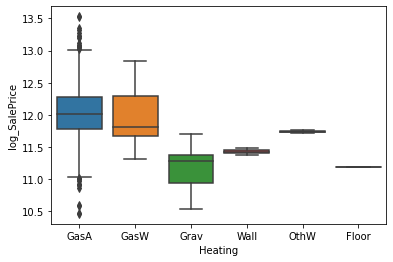

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


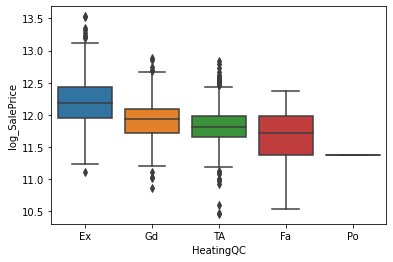

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


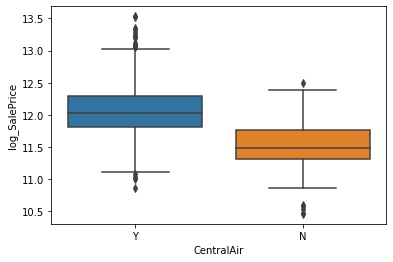

Y    1365
N      95
Name: CentralAir, dtype: int64


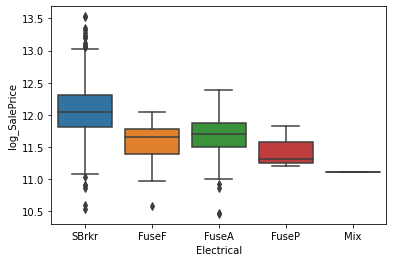

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


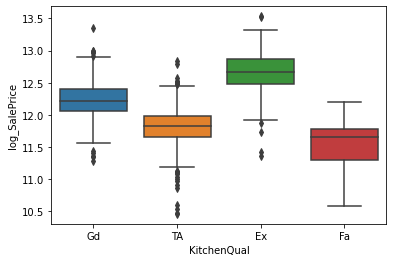

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


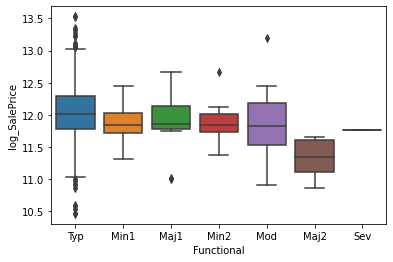

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


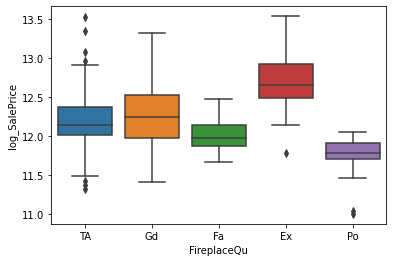

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


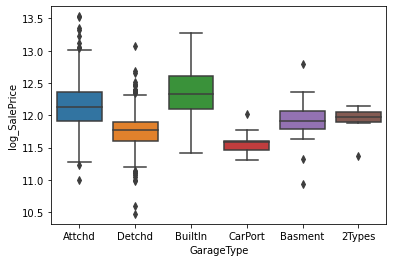

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


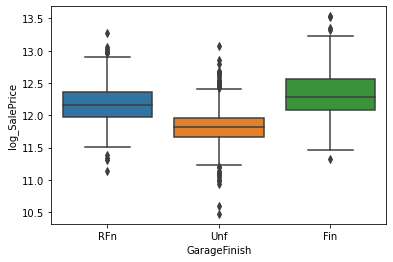

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


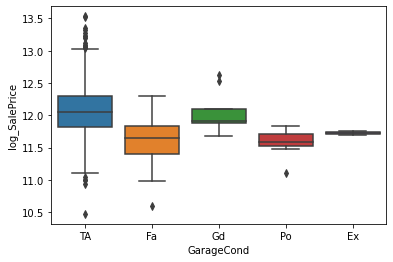

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


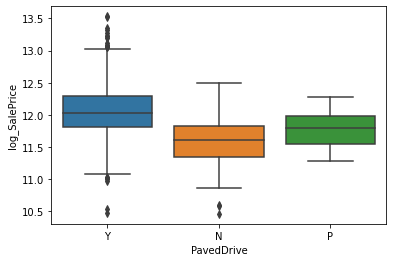

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


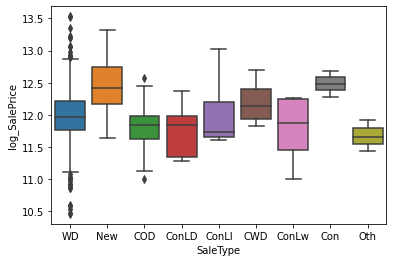

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


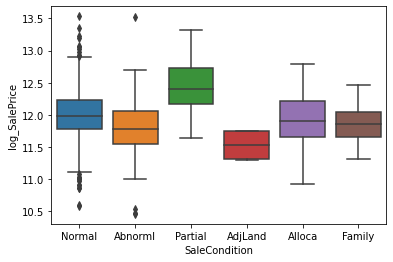

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [13]:
for i in categorial_features:
    if i in corr.index:
        sns.boxplot(data = data, x=i, y = 'log_SalePrice')
        plt.show()
        print(data[i].value_counts())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
reg = LinearRegression()
scaler.fit_transform(x_train)
data_arr_transform = [scaler.transform(x_train), y_train, scaler.transform(x_test), y_test]
model_estimator(reg, data_arr_transform)


train score 0.8834548254492587, test score 0.8953470820111131
trian log_loss 0.018193538721179535, test log_loss 0.017464695100944786


In [145]:
from catboost import CatBoostRegressor
from catboost import cv, Pool
cat_features = []
for i in categorial_features:
    if i in x_train.columns:
        cat_features.append(str(i))
parametrs = {"iterations": 1000, "depth": 3, "loss_function": "RMSE", 'cat_features':cat_features}
#dataset = Pool(data = x_train, label = y_train, cat_features=cat_features)
#cross_val = cv(pool = dataset, params = parametrs, fold_count=2)

In [146]:
#param_frid = {'':''}
cat_boost = CatBoostRegressor(**parametrs, verbose = 0) #, grid_search = sklearn.model_selection.GridSearchCV(model, param_grid))
cat_boost.fit(x_train, y_train)

In [147]:
cat_boost.score(x_train, y_train), cat_boost.score(x_test, y_test)

(0.9464408540192786, 0.9002465973400012)

In [ ]:
test = pd.read_csv('test.csv')
test.fillna(0, inplace = True)
result = pd.DataFrame()
result['Id'] = test['Id']
test = test[corr.index]
result['SalePrice'] = inverse_transform_func(cat_boost.predict(test))
result.to_csv('new_result.csv', index = False)